In [1]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#read the csv values inside a variable
df = pd.read_csv("data.csv")

avg_score = df.groupby("Country")["AveragScore"].mean()



In [3]:
# get the data description and find the quartile ranges specifically q1 sand q3
df['AveragScore'].describe()
# now from this we shall extract q1 and q3
quartile_1 = df['AveragScore'].quantile(0.25)
quartile_3 = df['AveragScore'].quantile(0.75)
#getting the inter quartile range
inter_quartile=quartile_3-quartile_1
#the bounds
lower_bound = quartile_1 - 1.5 * inter_quartile
upper_bound = quartile_3 + 1.5 * inter_quartile

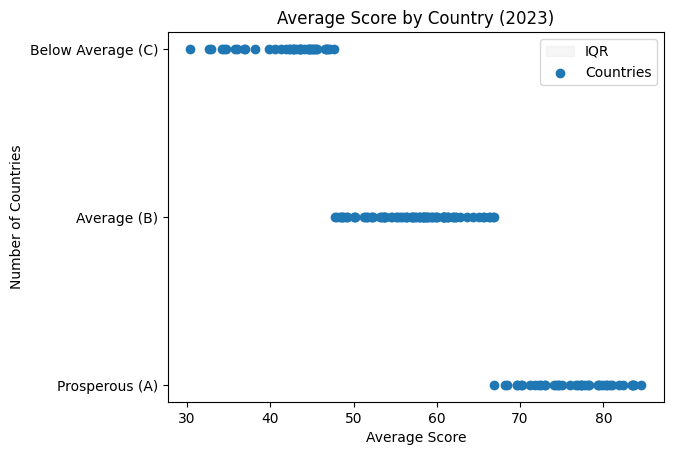

In [14]:

df['Class']=pd.cut(df['AveragScore'],
bins=[lower_bound,quartile_1,quartile_3,upper_bound],
labels=['Below Average (C)','Average (B)','Prosperous (A)'],right=False)

plt.fill_between([quartile_1, quartile_3], [quartile_1, quartile_1], [quartile_3, quartile_3], color='lightgray', alpha=0.2, label='IQR')


plt.scatter(df['AveragScore'],df['Class'],label='Countries')

plt.legend()


plt.xlabel('Average Score')
plt.ylabel('Number of Countries')
plt.title('Average Score by Country (2023)')
plt.show()